Udemy Data Set(Finance and Accounting Courses)
Objecitve: To find out the best courses to be reccomended to the employees/members of an organizaion

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('C:/Users/user/Desktop/intellipaat/Datasets/udemy_courses.csv')

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
df.shape

(3678, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [173]:
#converting the timestamp into proper format

In [18]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [19]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [20]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [21]:
df['published_date'].head()

0    2017-01-18
1    2017-03-09
2    2016-12-19
3    2017-05-30
4    2016-12-13
Name: published_date, dtype: object

In [23]:
df['published_date'].dtype

dtype('O')

In [24]:
#converting object to date type using 
from datetime import datetime

In [25]:
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [27]:
df['published_date'] = df['published_date'].apply(lambda x: convert_to_dt(x))

In [30]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18


In [32]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [33]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [34]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18


+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [12]:
##What is the distribution of subjects
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [15]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [13]:
##How many courses per subject
df.subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

<AxesSubplot:>

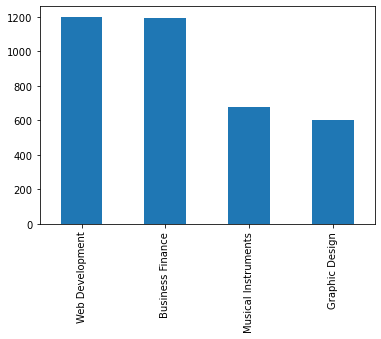

In [16]:
df.subject.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='subject'>

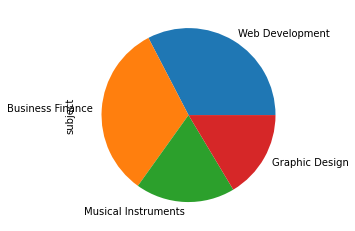

In [17]:
df.subject.value_counts().plot(kind='pie')

In [48]:
#Distribution of subjects per year
df.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64

In [55]:
#How many people purchase a particular subject per year
df.groupby(by=['year','subject'])['num_subscribers'].sum()

year  subject            
2011  Web Development         119028
2012  Business Finance          3620
      Graphic Design          100649
      Musical Instruments     133635
      Web Development         317435
2013  Business Finance        311664
      Graphic Design           50133
      Musical Instruments     150224
      Web Development        1211417
2014  Business Finance        494623
      Graphic Design          174582
      Musical Instruments     156152
      Web Development        1105049
2015  Business Finance        501858
      Graphic Design          352856
      Musical Instruments     190368
      Web Development        2430242
2016  Business Finance        426647
      Graphic Design          229587
      Musical Instruments     148748
      Web Development        2161662
2017  Business Finance        130299
      Graphic Design          155341
      Musical Instruments      67562
      Web Development         635739
Name: num_subscribers, dtype: int64

In [56]:
#How many people purchase a particular subject
df.groupby(by=['subject'])['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

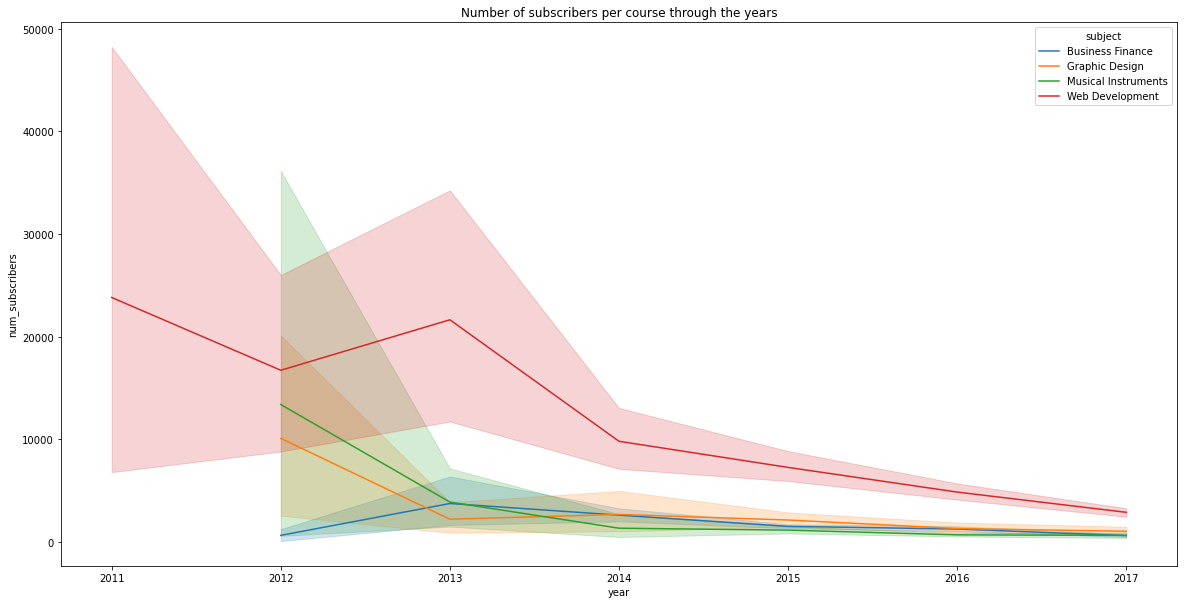

In [70]:
#Which subject is the most popular
plt.figure(figsize=(20,10))
plt.title('Number of subscribers per course through the years')
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

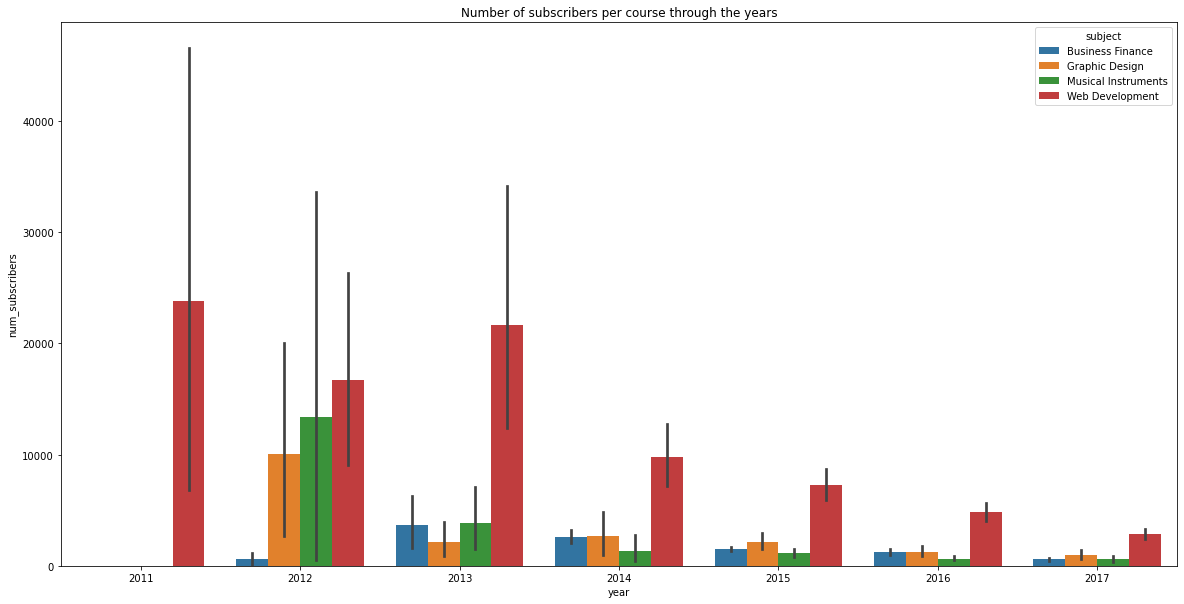

In [71]:
#Which subject is the most popular
plt.figure(figsize=(20,10))
plt.title('Number of subscribers per course through the years')
sns.barplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

Even though the subscriber count has decreased over years, Web Development course seems to be the most popular.

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

In [65]:
#Number of courses per year
df.groupby('year')['course_id'].count()

year
2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     715
Name: course_id, dtype: int64

#Which year has the highest number of courses
:: 2016 has the highest number of courses created

<AxesSubplot:xlabel='year'>

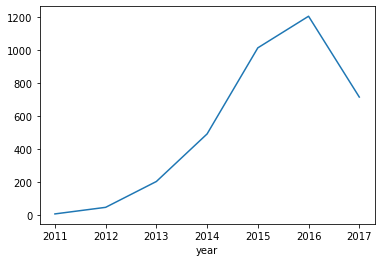

In [66]:
#What is the trend of courses per year
df.groupby('year')['course_id'].count().plot(kind='line')

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

In [73]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'published_date',
       'year', 'month', 'day'],
      dtype='object')

In [75]:
#How many levels do we have
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [74]:
#What is the distribution of courses per levels
df.level.value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [95]:
#Which subject have the highest levels
df.groupby(['subject','level'])['course_id'].count()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Expert Level           31
                     Intermediate Level    128
Graphic Design       All Levels            298
                     Beginner Level        243
                     Expert Level            5
                     Intermediate Level     57
Musical Instruments  All Levels            276
                     Beginner Level        296
                     Expert Level            7
                     Intermediate Level    101
Web Development      All Levels            659
                     Beginner Level        391
                     Expert Level           15
                     Intermediate Level    135
Name: course_id, dtype: int64

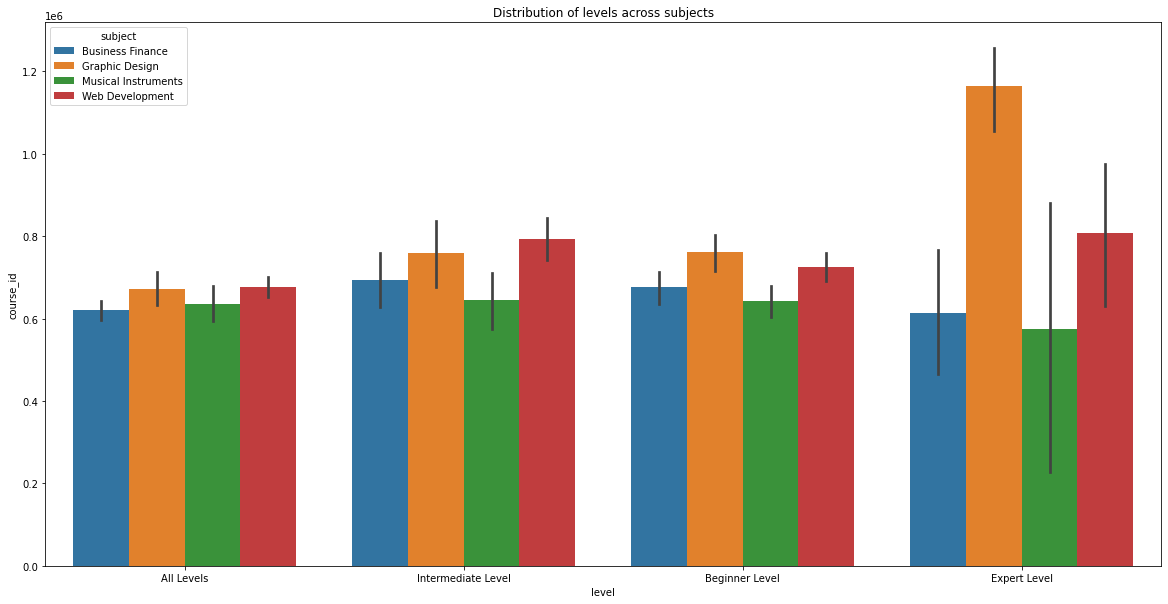

In [89]:
plt.figure(figsize=(20,10))
plt.title("Distribution of levels across subjects")
sns.barplot(data=df,x='level',y='course_id',hue='subject')
plt.show()

Maximum number of courses are there for Graphic Design course at expert level. Rest all subject-Level combinations have overall equal distribution

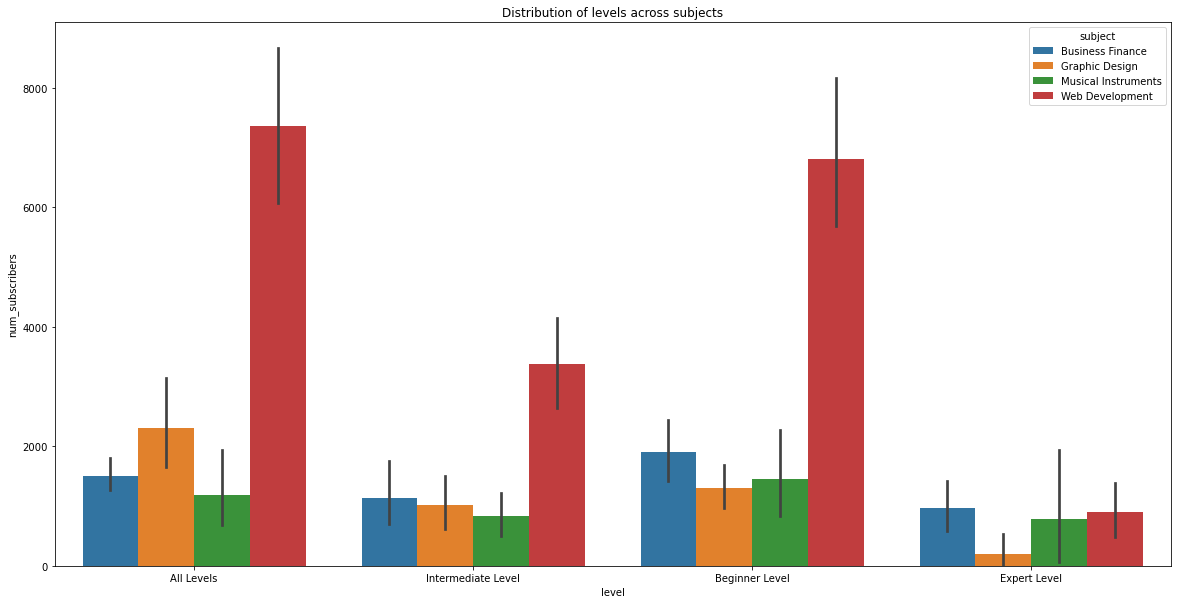

In [96]:
plt.figure(figsize=(20,10))
plt.title("Distribution of levels across subjects")
sns.barplot(data=df,x='level',y='num_subscribers',hue='subject')
plt.show()

Maximum people have subscribed to Web development course at Beginner Level and All Level.
##Suggestion: Web Development Beginner courses can be launched by other companies/Ed_techs

<AxesSubplot:xlabel='level'>

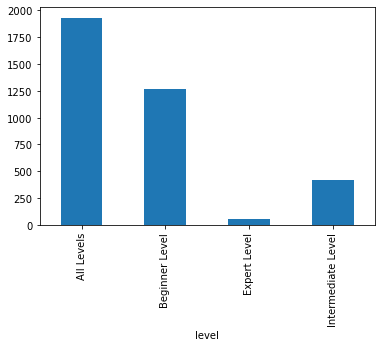

In [99]:
#How many courses per levels
df.groupby('level')['course_id'].count().plot(kind='bar')

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

In [100]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'published_date',
       'year', 'month', 'day'],
      dtype='object')

In [109]:
#Which courses have the highest duration (paid or not)
df.groupby(['subject','is_paid'])['content_duration'].sum()

subject              is_paid
Business Finance     False       206.266667
                     True       4039.566667
Graphic Design       False        67.116667
                     True       2091.950000
Musical Instruments  False        71.166667
                     True       1869.816667
Web Development      False       340.783333
                     True       6372.966667
Name: content_duration, dtype: float64

In [111]:
#Which courses have higher duration
df.groupby(['subject'])['content_duration'].sum()

subject
Business Finance       4245.833333
Graphic Design         2159.066667
Musical Instruments    1940.983333
Web Development        6713.750000
Name: content_duration, dtype: float64

<AxesSubplot:xlabel='content_duration', ylabel='num_subscribers'>

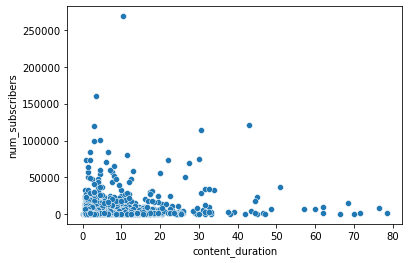

In [114]:
#Duration vs number of subscribers
sns.scatterplot(data=df,x='content_duration',y='num_subscribers')

From above scatterplot we can infer that majority of subscribers prefer the total course duration to be less than 20-25 hrs

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [117]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'published_date',
       'year', 'month', 'day'],
      dtype='object')

In [118]:
#Which course have the highest number of subscribers
#Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

Text(0.5, 1.0, 'Distribution of subscribers on basis of subjects')

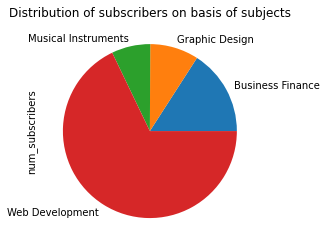

In [125]:
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')
plt.title("Distribution of subscribers on basis of subjects")

In [120]:
#Average number of subscribers
df.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

Text(0.5, 1.0, 'mean number of subscriber')

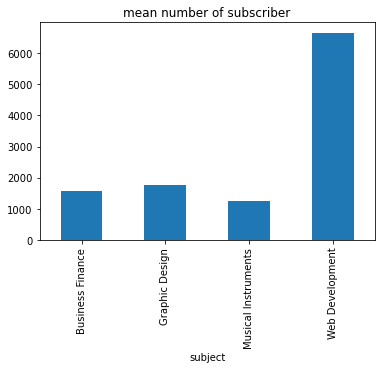

In [124]:
df.groupby('subject')['num_subscribers'].mean().plot(kind='bar')
plt.title("mean number of subscriber")

In [126]:
#Number of subscribers per year
df.groupby('year')['num_subscribers'].sum()

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64

<AxesSubplot:title={'center':'Number of subscribers per year'}, xlabel='year'>

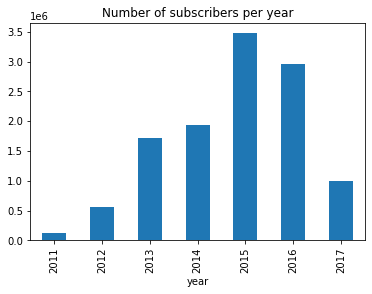

In [127]:
plt.title("Number of subscribers per year")
df.groupby('year')['num_subscribers'].sum().plot(kind='bar')

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [130]:
#What is the average price of a course
df.groupby('subject')['price'].mean()

subject
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Web Development        77.033333
Name: price, dtype: float64

In [131]:
#What is the min/max price
df.groupby('subject')['price'].max()

subject
Business Finance       200
Graphic Design         200
Musical Instruments    200
Web Development        200
Name: price, dtype: int64

Looks like Udemy has capped the max price at 200inr

In [132]:
df.groupby('subject')['price'].min()

subject
Business Finance       0
Graphic Design         0
Musical Instruments    0
Web Development        0
Name: price, dtype: int64

Indicates that courses are free.

In [136]:
#How much does Udemy earn
df['Earnings']=df['num_subscribers']*df['price']

In [138]:
#88.5 crore
df.Earnings.sum()

884921315

In [140]:
df.Earnings.max()

24316800

In [153]:
#The most profitable courses
df.loc[df.Earnings==df.Earnings.max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,Earnings
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,2015,11,2,24316800


In [154]:
#course name
df.loc[df.Earnings==df.Earnings.max()].course_title

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [164]:
df.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,year,month,day,Earnings
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223,0.933151,-0.067373,0.015786,-0.053973
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417,-0.017609,0.034718,-0.018876,0.072902
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450,0.132990,0.038389,0.012959,0.346617
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839,-0.184574,0.015244,0.006244,0.557175
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889,-0.053318,0.006853,-0.003572,0.769948
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647,-0.025085,0.031808,-0.006121,0.321816
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000,-0.058752,0.020887,-0.002267,0.296736
year,0.933151,-0.017609,0.132990,-0.184574,-0.053318,-0.025085,-0.058752,1.000000,-0.288077,-0.018348,-0.059011
month,-0.067373,0.034718,0.038389,0.015244,0.006853,0.031808,0.020887,-0.288077,1.000000,0.015318,0.035084
day,0.015786,-0.018876,0.012959,0.006244,-0.003572,-0.006121,-0.002267,-0.018348,0.015318,1.000000,0.001408


<AxesSubplot:xlabel='num_reviews', ylabel='num_subscribers'>

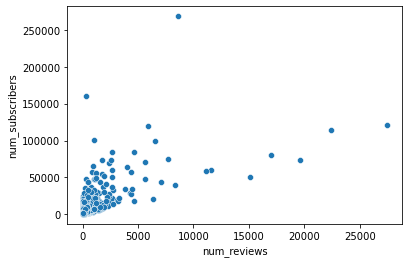

In [169]:
sns.scatterplot(data=df, y='num_subscribers',x='num_reviews')

With increase in reviews we can see the subscriber coun increasing, although not so strongly

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

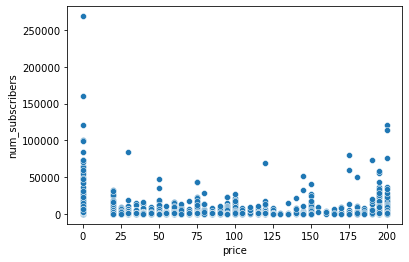

In [170]:
sns.scatterplot(data=df, y='num_subscribers',x='price')

With increase in price, the effect of no of subscriber is weak.

<AxesSubplot:xlabel='num_lectures', ylabel='num_subscribers'>

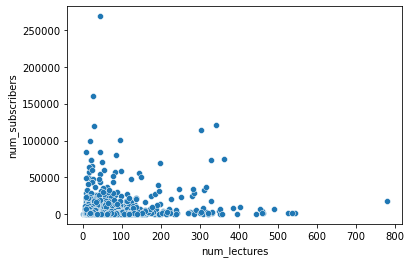

In [171]:
sns.scatterplot(data=df, y='num_subscribers',x='num_lectures')

With increase in number of lectures, the number of subscibers are somewhat decreasing

<AxesSubplot:xlabel='content_duration', ylabel='num_subscribers'>

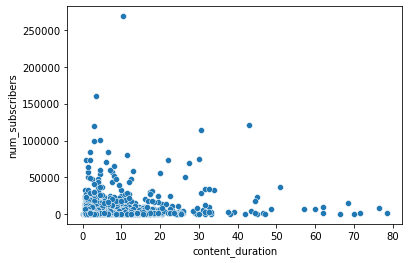

In [172]:
sns.scatterplot(data=df, y='num_subscribers',x='content_duration')

With increase in content duration the subscribers are less likely to take up the course

# END of EDA

# ............................................********************************..................................

In [ ]:
## Possible opportunities for creating a collection of best courses. This collection will act as a source for our reccomender system
- Classify the courses into clusters. One of them would be containing the best ones

In [174]:
#gathering the required columns for clustering
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'published_date',
       'year', 'month', 'day', 'Earnings'],
      dtype='object')

In [175]:
list={'price','num_subscribers', 'num_reviews', 'num_lectures', 'content_duration'}

In [176]:
data=df[list]

In [177]:
data.head(3)

,price,num_reviews,content_duration,num_subscribers,num_lectures
0,200,23,1.5,2147,51
1,75,923,39.0,2792,274
2,45,74,2.5,2174,51


In [178]:
#scale the data
scaler = StandardScaler()

In [179]:
data_scaled = scaler.fit_transform(data)#mean= 0 and sd=1
data_scaled

array([[ 2.19600149, -0.14247361, -0.428632  , -0.11050931,  0.21619696],
       [ 0.14673589,  0.81975891,  5.76662528, -0.04263476,  4.64286453],
       [-0.34508786, -0.0879471 , -0.26342514, -0.10766805,  0.21619696],
       ...,
       [-0.42705848,  0.01362189, -0.09821828, -0.28245818,  0.15664538],
       [-0.26311723, -0.13392043, -0.18082171, -0.30487257, -0.04185989],
       [-0.34508786, -0.12857469, -0.34602857, -0.24162822, -0.39916938]])

In [180]:
import sklearn
from sklearn.cluster import KMeans

In [181]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [182]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [183]:
a=kmeans.labels_
a=pd.DataFrame(a)
a.value_counts()

0    3437
1     225
2      16
dtype: int64

In [184]:
# assign the label
df['Cluster_Id'] = kmeans.labels_
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,Earnings,Cluster_Id
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18,429400,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09,2017,3,9,209400,1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19,2016,12,19,97830,0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30,2017,5,30,232845,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13,2016,12,13,255200,0


In [186]:
df[df['Cluster_Id']==0].head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,Earnings,Cluster_Id
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18,429400,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19,2016,12,19,97830,0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30,2017,5,30,232845,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13,2016,12,13,255200,0
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance,2014-05-02,2014,5,2,1383150,0


In [198]:
df[df['Cluster_Id']==1]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,Earnings,Cluster_Id
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09,2017,3,9,209400,1
38,321410,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,True,195,22257,2697,138,All Levels,7.5,2014-11-25T23:00:40Z,Business Finance,2014-11-25,2014,11,25,4340115,1
40,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,True,195,24481,2347,174,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance,2016-01-21,2016,1,21,4773795,1
42,1154754,Financial Modeling for Startups & Small Busine...,https://www.udemy.com/financial-modeling-for-s...,True,195,4991,137,79,Beginner Level,11.5,2017-03-29T22:36:05Z,Business Finance,2017-03-29,2017,3,29,973245,1
44,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,True,200,20195,1113,227,All Levels,16.0,2014-10-27T22:01:36Z,Business Finance,2014-10-27,2014,10,27,4039000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,975916,17 Complete JavaScript projects explained st...,https://www.udemy.com/17-complete-javascript-p...,True,185,327,26,106,Beginner Level,9.5,2016-10-26T14:03:38Z,Web Development,2016-10-26,2016,10,26,60495,1
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,True,200,279,37,119,All Levels,10.0,2017-04-25T00:57:35Z,Web Development,2017-04-25,2017,4,25,55800,1
3654,949134,The Extreme Web Development Course - For Begin...,https://www.udemy.com/the-extreme-web-developm...,True,200,1420,62,152,All Levels,5.5,2016-09-04T20:51:08Z,Web Development,2016-09-04,2016,9,4,284000,1
3658,459922,The Complete Web Developer Course - Build 20 W...,https://www.udemy.com/the-complete-web-develop...,True,20,2650,61,304,All Levels,15.5,2015-03-26T22:11:15Z,Web Development,2015-03-26,2015,3,26,53000,1


In [187]:
list

{'content_duration', 'num_lectures', 'num_reviews', 'num_subscribers', 'price'}

<AxesSubplot:xlabel='num_reviews', ylabel='num_subscribers'>

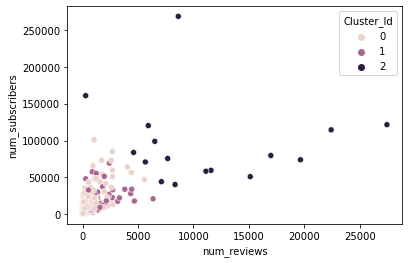

In [199]:
sns.scatterplot(data=df,y=df['num_subscribers'],x=df['num_reviews'],hue='Cluster_Id')
#plt.scatter(x=df['Frequency'],y=df['Cluster_Id']==1)
#plt.scatter(x=df['Recency'],y=df['Cluster_Id']==2)

In [ ]:
# 3D visualization


Possible opportunity :
    Method 2: Manually Score the variables and Classify the courses into clusters

In [201]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'published_date',
       'year', 'month', 'day', 'Earnings', 'Cluster_Id'],
      dtype='object')

In [202]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,year,month,day,Earnings,Cluster_Id
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213,6.164220,15.831158,2.405985e+05,0.069875
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317,3.380535,8.781086,1.001404e+06,0.271501
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000e+00,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000,3.000000,8.000000,1.585000e+03,0.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000,6.000000,16.000000,2.306500e+04,0.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000,9.000000,23.000000,1.187500e+05,0.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000,12.000000,31.000000,2.431680e+07,2.000000


Variables/parameters for creating a Logic to Scoring the course:
    -Price: (+)On lower side
        In this case, the prices are maximum Rs 200. Considering it as low, we ignore the price here
    -Num_Subscribers: (+) on the higher side
        This appears to be more since by default the user becomes a subsciber on taking up the course
    -Num_Reviews: (+) on the higher side
        Less than Subscribers but more important.
    -Content Duration: (+) around the mean, rest(-)
        We can consider courses that have duration more than 75 percentile i.e 4 hrs
    -Number of Lectures: <250 is (+)    
    Final Scoring:
     Parameter 1: (Num_Reviews/Num_Subscribers): Helps in recognising a genuine subscriber to review course. Removes outliers
     Parameter 2: Content Duration: courses that have duration more than 75 percentile i.e 4 hrs

In [205]:
#checking for parameter 1:
df['Rev_Sub']=(df.num_reviews/df.num_subscribers)

In [208]:
df['Rev_Sub']=df['Rev_Sub']*100

In [209]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,year,month,day,Earnings,Cluster_Id,Rev_Sub
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03,3678.000000,3608.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213,6.164220,15.831158,2.405985e+05,0.069875,6.852699
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317,3.380535,8.781086,1.001404e+06,0.271501,10.143571
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000,3.000000,8.000000,1.585000e+03,0.000000,0.967976
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000,6.000000,16.000000,2.306500e+04,0.000000,3.080378
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000,9.000000,23.000000,1.187500e+05,0.000000,9.434072
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000,12.000000,31.000000,2.431680e+07,2.000000,100.000000


<AxesSubplot:>

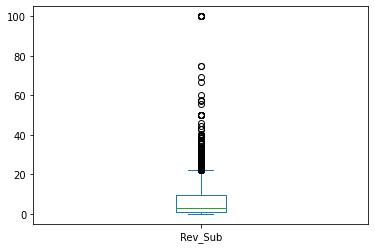

In [210]:
df.Rev_Sub.plot(kind='box')

In [227]:
Source=df.loc[(df['Rev_Sub']>5) & (df['content_duration']>4) & (df['num_lectures']<250)]

In [228]:
Source.shape

(513, 19)

In [229]:
Source.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,Earnings,Cluster_Id,Rev_Sub
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28T16:41:44Z,Business Finance,2017-04-28,2017,4,28,58800,0,6.462585
25,383414,Beginner to Pro in PowerPoint: Complete PowerP...,https://www.udemy.com/powerpoint-master-class-...,True,150,5786,518,50,All Levels,5.0,2015-01-31T15:34:05Z,Business Finance,2015-01-31,2015,1,31,867900,0,8.952644


In [230]:
Source.groupby('subject')['course_id'].count()

subject
Business Finance       125
Graphic Design          84
Musical Instruments     56
Web Development        248
Name: course_id, dtype: int64